In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('DATA/heart_disease_dataset_01.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,66,0,2,114,352,0,1,165,0,0.0,2,2,2,0
1,72,1,0,134,459,0,0,197,1,3.8,2,2,2,1
2,41,1,2,144,291,0,0,156,1,1.8,2,2,3,0
3,37,0,1,98,386,0,2,131,0,0.2,0,0,1,1
4,38,0,2,103,425,1,0,169,0,4.0,1,1,3,1


In [3]:
num_features = df.shape[1] - 1
num_classes = df.iloc[:, -1].nunique()

print(f"Number of features: {num_features}")
print(f"Number of target classes: {num_classes}")
print(f"Target class distribution:\n{df.iloc[:, -1].value_counts()}\n")

Number of features: 13
Number of target classes: 2
Target class distribution:
target
1    160
0    143
Name: count, dtype: int64



In [4]:
features_to_plot = df.columns[:-1][:4].tolist()
target_col = df.columns[-1]

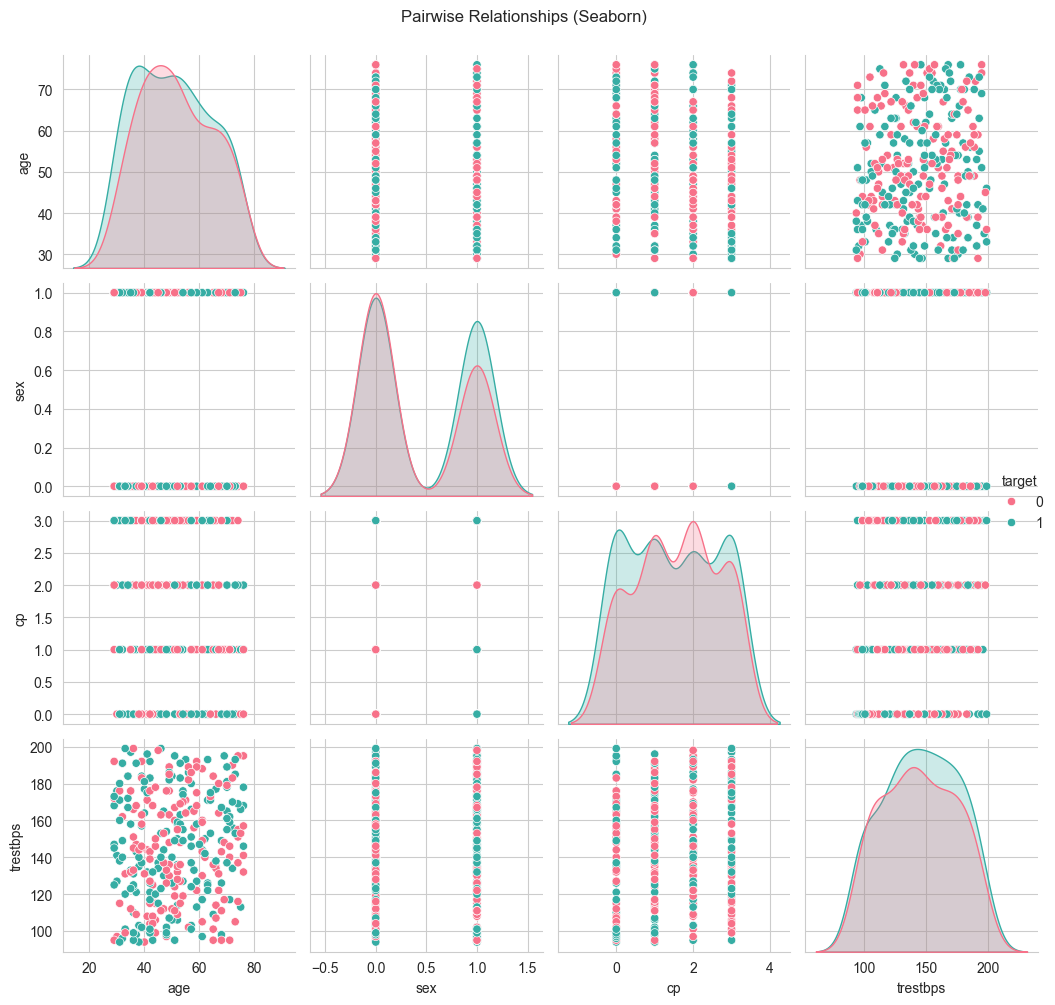

In [5]:
sns.set_style("whitegrid")
pairplot = sns.pairplot(df[features_to_plot + [target_col]],
                        hue=target_col,
                        palette="husl",
                        diag_kind="kde")
plt.suptitle('Pairwise Relationships (Seaborn)', y=1.001)
plt.tight_layout()
plt.savefig('pairplot_seaborn.png', dpi=100, bbox_inches='tight')
plt.show()

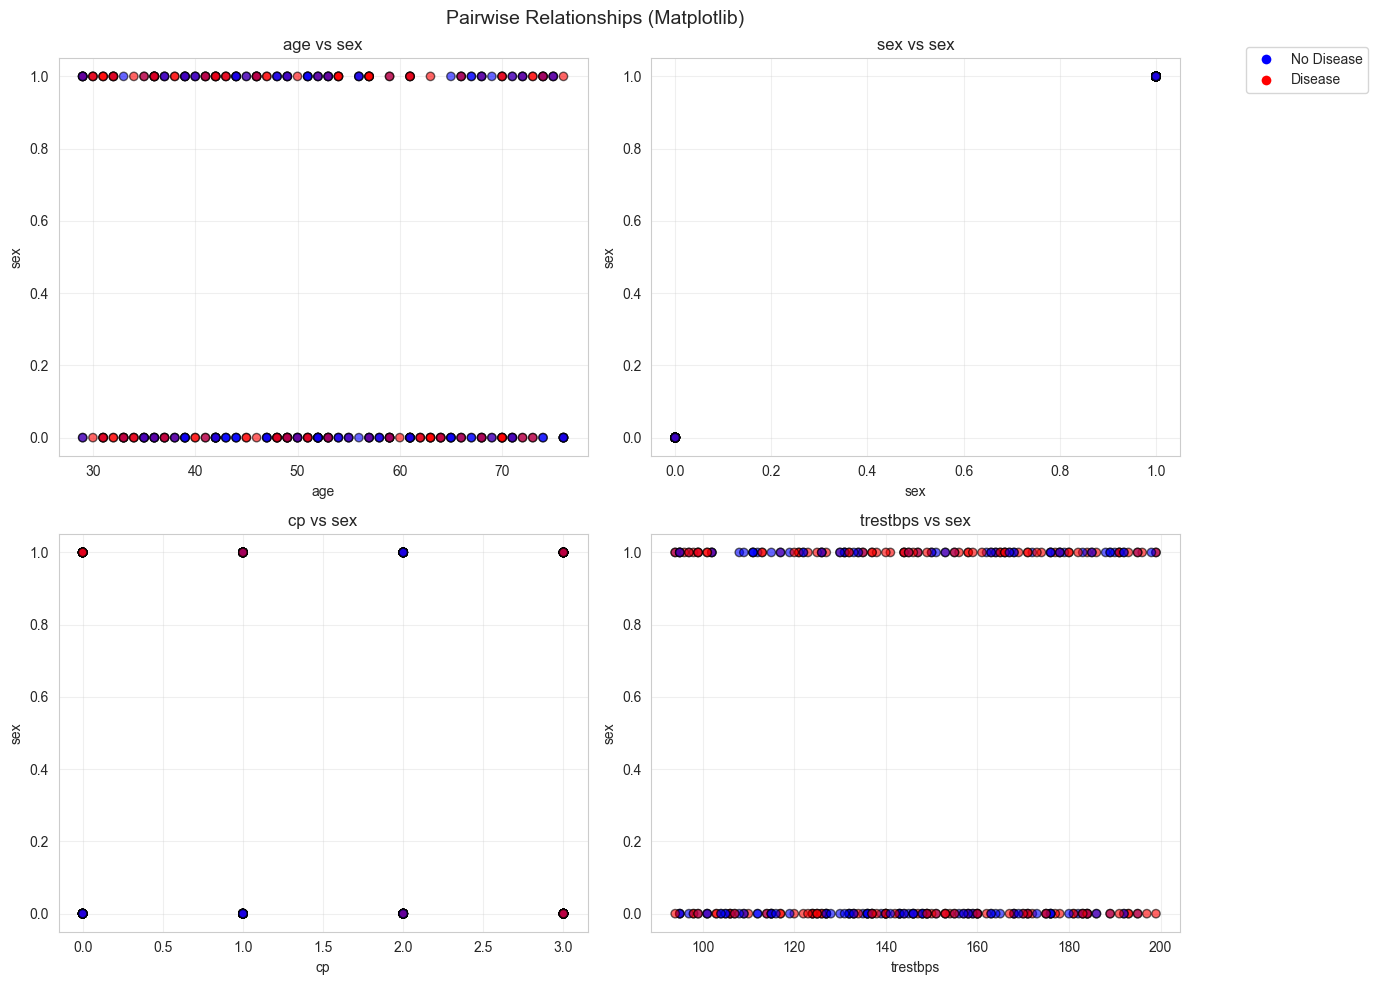

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, feature in enumerate(features_to_plot):
    colors = df[target_col].map({0: 'blue', 1: 'red'})
    axes[idx].scatter(df[feature], df.iloc[:, 1], c=colors, alpha=0.6, edgecolors='k')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel(df.columns[1])
    axes[idx].set_title(f'{feature} vs {df.columns[1]}')
    axes[idx].grid(True, alpha=0.3)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='No Disease'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Disease')]
fig.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.15, 0.95))
plt.suptitle('Pairwise Relationships (Matplotlib)', fontsize=14)
plt.tight_layout()
plt.savefig('pairplot_matplotlib.png', dpi=100, bbox_inches='tight')
plt.show()